In [1]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/machineHack/Workation Price Prediction Challenge/Participant_Data_WPPH.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')


finish


In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv("/content/Participant_Data_WPPH/Train.csv")
test = pd.read_csv('/content/Participant_Data_WPPH/Test.csv')
submission = pd.read_csv('/content/Participant_Data_WPPH/sample submission.csv')

In [4]:
train['Travel Date'] = pd.to_datetime(train['Travel Date'])

In [5]:
train['Year']=pd.DatetimeIndex(train['Travel Date']).year
train['month']=pd.DatetimeIndex(train['Travel Date']).month


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Uniq Id                     21000 non-null  object        
 1   Package Name                21000 non-null  object        
 2   Package Type                21000 non-null  object        
 3   Destination                 21000 non-null  object        
 4   Itinerary                   21000 non-null  object        
 5   Places Covered              21000 non-null  object        
 6   Travel Date                 21000 non-null  datetime64[ns]
 7   Hotel Details               21000 non-null  object        
 8   Start City                  21000 non-null  object        
 9   Airline                     21000 non-null  object        
 10  Flight Stops                21000 non-null  int64         
 11  Meals                       21000 non-null  int64     

In [11]:
# select numerical and categorical features
def divideFeatures(train):
    numerical_features = train.select_dtypes(include=[np.number])
    categorical_features = train.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

In [12]:
continuous_data, categorical_data = divideFeatures(train)
categorical_data[:5]

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Hotel Details,Start City,Airline,Sightseeing Places Covered,Cancellation Rules
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,Not Available,Mumbai,Not Available,Not Available,Not Available
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...


In [13]:
df_train = train.drop(columns=['Uniq Id'])
print('Shape',df_train.shape)
df_train.head(2)

Shape (21000, 16)


,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Year,month
0,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,2021,7
1,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,2021-08-12,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,2021,8


In [14]:
continuous_data, categorical_data = divideFeatures(df_train)
categorical_data[:5]

,Package Name,Package Type,Destination,Itinerary,Places Covered,Hotel Details,Start City,Airline,Sightseeing Places Covered,Cancellation Rules
0,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,Not Available,Mumbai,Not Available,Not Available,Not Available
1,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...
2,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...
3,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...
4,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...


In [15]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [16]:
for col in categorical_data:
  df_train[col] = lb.fit_transform(df_train[col])

In [17]:
print('Shape:',df_train.shape)
df_train.head(3)

Shape: (21000, 16)


,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Year,month
0,421,4,417,214,417,2021-07-30,3202,0,211,2,3,1713,5,11509.0,2021,7
1,1138,3,533,283,533,2021-08-12,5463,1,125,0,5,524,0,22485.5,2021,8
2,1417,2,549,700,549,2021-04-26,5092,1,114,0,4,1000,0,12421.5,2021,4


In [18]:
X = df_train.drop(columns=['Per Person Price','Travel Date'])
print('Shape:',X.shape)
X.head(2)

Shape: (21000, 14)


,Package Name,Package Type,Destination,Itinerary,Places Covered,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Year,month
0,421,4,417,214,417,3202,0,211,2,3,1713,5,2021,7
1,1138,3,533,283,533,5463,1,125,0,5,524,0,2021,8


In [19]:
y=df_train['Per Person Price']

In [20]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
rs = MinMaxScaler()
for c in X.columns:
    X[c] = rs.fit_transform(X[c].values.reshape(-1, 1))
X.head()

,Package Name,Package Type,Destination,Itinerary,Places Covered,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Year,month
0,0.191103,1.00,0.739362,0.221762,0.739362,0.528470,0.0,0.674121,1.0,0.333333,1.000000,0.555556,0.0,0.545455
1,0.516568,0.75,0.945035,0.293264,0.945035,0.901634,1.0,0.399361,0.0,1.000000,0.305896,0.000000,0.0,0.636364
2,0.643214,0.50,0.973404,0.725389,0.973404,0.840403,1.0,0.364217,0.0,0.666667,0.583771,0.000000,0.0,0.272727
3,0.220608,0.75,0.583333,0.546114,0.583333,0.142928,1.0,0.364217,0.0,1.000000,0.638646,0.000000,0.0,0.636364
4,0.088970,0.75,0.785461,0.954404,0.785461,0.135831,1.0,0.760383,0.0,1.000000,0.196147,0.000000,0.0,1.000000


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2,random_state=30)

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

In [23]:
# feature selection
f_selector = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
f_selector.fit(X_train, y_train)


SelectKBest(k='all', score_func=<function f_regression at 0x7fd1ba7de4d0>)

In [24]:
# transform train input data
X_train_fs = f_selector.transform(X_train)
# transform test input data
X_test_fs = f_selector.transform(X_test)

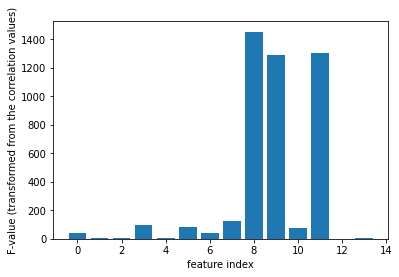

In [25]:
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

In [27]:

f_selector.scores_

array([4.12109240e+01, 4.52571640e+00, 5.18859119e+00, 9.70537614e+01,
       5.18859119e+00, 8.51337549e+01, 4.09219958e+01, 1.23785733e+02,
       1.45242553e+03, 1.29107261e+03, 7.23165725e+01, 1.30244449e+03,
       1.01334004e+00, 2.30897796e+00])

In [28]:
score = f_selector.scores_

In [29]:
Best_Feat = pd.DataFrame({'Feature_Score': score})

In [30]:
Best_Feat.head(5)

,Feature_Score
0,41.210924
1,4.525716
2,5.188591
3,97.053761
4,5.188591


In [31]:
name = df_train.columns
name

Index(['Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price', 'Year', 'month'],
      dtype='object')

In [32]:
col_name = pd.DataFrame({'col_name': name})

In [33]:
col_name.head()

,col_name
0,Package Name
1,Package Type
2,Destination
3,Itinerary
4,Places Covered


In [34]:

Merged = pd.concat([col_name, Best_Feat], axis=1)
Merged.head()

,col_name,Feature_Score
0,Package Name,41.210924
1,Package Type,4.525716
2,Destination,5.188591
3,Itinerary,97.053761
4,Places Covered,5.188591


In [35]:
Merged.sort_values(['Feature_Score'], ascending=False).head(15)

,col_name,Feature_Score
8,Airline,1452.425533
11,Sightseeing Places Covered,1302.444492
9,Flight Stops,1291.072612
7,Start City,123.785733
3,Itinerary,97.053761
5,Travel Date,85.133755
10,Meals,72.316573
0,Package Name,41.210924
6,Hotel Details,40.921996
2,Destination,5.188591
